## Studying pulmonary tuberculosis using the MIMIC-III database

In [22]:
# Init

import pandas as pd

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 


In [40]:
# Table ICD-9 Diagnoses

icd = pd.read_csv("DIAGNOSES_ICD.csv")
print(icd.shape)
icd.head()

(651047, 5)


ROW_ID  SUBJECT_ID  HADM_ID  SEQ_NUM ICD9_CODE
0    1297         109   172335      1.0     40301
1    1298         109   172335      2.0       486
2    1299         109   172335      3.0     58281
3    1300         109   172335      4.0      5855
4    1301         109   172335      5.0      4254

In [43]:
# Table Diagnoses Descriptions

dicd = pd.read_csv("D_ICD_DIAGNOSES.csv")
print(dicd.shape)
dicd.head()

(14567, 4)


ROW_ID ICD9_CODE               SHORT_TITLE  \
0     174     01166     TB pneumonia-oth test   
1     175     01170    TB pneumothorax-unspec   
2     176     01171   TB pneumothorax-no exam   
3     177     01172  TB pneumothorx-exam unkn   
4     178     01173  TB pneumothorax-micro dx   

                                          LONG_TITLE  
0  Tuberculous pneumonia [any form], tubercle bac...  
1              Tuberculous pneumothorax, unspecified  
2  Tuberculous pneumothorax, bacteriological or h...  
3  Tuberculous pneumothorax, bacteriological or h...  
4  Tuberculous pneumothorax, tubercle bacilli fou...

In [44]:
# Pulmonary tuberculosis: ICD9 011

tuberc = icd[~icd.ICD9_CODE.isna()]
tuberc = icd[icd.ICD9_CODE.str.startswith("011")==True]
tuberc.drop(["ROW_ID"],axis=1, inplace=True)
print(tuberc.shape)
tuberc

(15, 4)


<ipython-input-44-e52bf35788c6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tuberc.drop(["ROW_ID"],axis=1, inplace=True)


SUBJECT_ID  HADM_ID  SEQ_NUM ICD9_CODE
130137       12139   148809      3.0     01190
130138       12139   148809      4.0     01136
176061       15046   104752      5.0     01194
226729       21192   140260      8.0     01190
229369       22532   167853      1.0     01193
325087       30544   119017      3.0     01194
336906       28120   120409      2.0     01164
443439       52831   106939      3.0     01190
454775       57599   180150      4.0     01190
460270       58702   114246     18.0     01190
480662       63944   187913     15.0     01123
498832       68946   182954      9.0     01190
571194       86226   106915      2.0     01190
582658       84318   188604      5.0     01186
599773       89840   186211      9.0     01190

In [ ]:
# DO NOT RUN THIS CELL! (Table too big)

# Table ChartEvents

cev = pd.read_csv("CHARTEVENTS.csv.gz")
cev.drop(["ROW_ID"], axis=1, inplace=True)
tcev = pd.merge(tuberc, cev, how='inner', on=['SUBJECT_ID'])
tcev.head()


In [45]:
# Table InputEvents

iev = pd.read_csv("INPUTEVENTS_CV.csv.gz")
iev.drop(["ROW_ID"], axis=1, inplace=True)
tiev = pd.merge(tuberc, iev, how="inner", on=["SUBJECT_ID"])
tiev.drop_duplicates()
print(tiev.shape)
tiev.head()

<ipython-input-45-89d8afbdf574>:3: DtypeWarning: Columns (7,9,17,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  iev = pd.read_csv("INPUTEVENTS_CV.csv.gz")


(7623, 24)


SUBJECT_ID  HADM_ID_x  SEQ_NUM ICD9_CODE  HADM_ID_y  ICUSTAY_ID  \
0       12139     148809      3.0     01190   148809.0    240663.0   
1       12139     148809      3.0     01190   148809.0    240663.0   
2       12139     148809      3.0     01190   148809.0    240663.0   
3       12139     148809      3.0     01190   148809.0    240663.0   
4       12139     148809      3.0     01190   148809.0    240663.0   

             CHARTTIME  ITEMID  AMOUNT AMOUNTUOM  RATE RATEUOM  \
0  2152-05-26 04:00:00   30056   100.0        ml   NaN     NaN   
1  2152-05-26 08:00:00   30056   100.0        ml   NaN     NaN   
2  2152-05-30 06:00:00   30013    50.0        ml   NaN     NaN   
3  2152-05-30 08:00:00   30013   300.0        ml   NaN     NaN   
4  2152-05-30 18:00:00   30013   100.0        ml   NaN     NaN   

             STORETIME     CGID   ORDERID  LINKORDERID STOPPED  NEWBOTTLE  \
0  2152-05-26 03:53:00  15477.0  11668241     11668241     NaN        NaN   
1  2152-05-26 08:10:00  19150.0   7762335     11668241     NaN        NaN   
2  2152-05-30 05:44:00  20706.0   1555379      4704410     NaN        NaN   
3  2152-05-30 08:01:00  16890.0   8942938      4704410     NaN        NaN   
4  2152-05-30 18:40:00  17480.0   8181876      4704410     NaN        NaN   

   ORIGINALAMOUNT ORIGINALAMOUNTUOM     ORIGINALROUTE  ORIGINALRATE  \
0             NaN                ml              Oral           NaN   
1             NaN                ml              Oral           NaN   
2           100.0                ml  Intravenous Push           NaN   
3           100.0                ml  Intravenous Push           NaN   
4           100.0                ml  Intravenous Push           NaN   

  ORIGINALRATEUOM ORIGINALSITE  
0             NaN          NaN  
1             NaN          NaN  
2             NaN          NaN  
3             NaN          NaN  
4             NaN          NaN

In [27]:
tiev.describe(include="all")

SUBJECT_ID      HADM_ID_x      SEQ_NUM ICD9_CODE      HADM_ID_y  \
count    7623.000000    7623.000000  7623.000000      7623    7623.000000   
unique           NaN            NaN          NaN         5            NaN   
top              NaN            NaN          NaN     01194            NaN   
freq             NaN            NaN          NaN      5247            NaN   
mean    14954.734881  118716.719139     4.446150       NaN  123578.953168   
std      3452.643050   20475.074860     0.944792       NaN   19062.147291   
min     12139.000000  104752.000000     1.000000       NaN  103875.000000   
25%     12139.000000  104752.000000     4.000000       NaN  104752.000000   
50%     15046.000000  104752.000000     5.000000       NaN  116990.000000   
75%     15046.000000  148809.000000     5.000000       NaN  148809.000000   
max     30544.000000  167853.000000     8.000000       NaN  190121.000000   

           ICUSTAY_ID            CHARTTIME        ITEMID       AMOUNT  \
count     7623.000000                 7623   7623.000000  5668.000000   
unique            NaN                 1138           NaN          NaN   
top               NaN  2152-05-26 20:00:00           NaN          NaN   
freq              NaN                   34           NaN          NaN   
mean    241767.115309                  NaN  30086.923914    47.035957   
std      16577.010373                  NaN     73.960937   131.178115   
min     212957.000000                  NaN  30001.000000     0.000000   
25%     223314.000000                  NaN  30018.000000     4.000000   
50%     240663.000000                  NaN  30118.000000    10.000000   
75%     247246.000000                  NaN  30124.000000    55.000000   
max     299299.000000                  NaN  30354.000000  5000.000000   

       AMOUNTUOM         RATE RATEUOM            STORETIME          CGID  \
count       5679  1897.000000    1900                 7623   7613.000000   
unique         5          NaN       4                 1047           NaN   
top           ml          NaN   mcghr  2152-05-26 19:18:00           NaN   
freq        3975          NaN     816                   94           NaN   
mean         NaN    49.194149     NaN                  NaN  18279.038881   
std          NaN    92.136112     NaN                  NaN   2409.378502   
min          NaN     0.000000     NaN                  NaN  14411.000000   
25%          NaN     2.500000     NaN                  NaN  15225.000000   
50%          NaN     5.000000     NaN                  NaN  19150.000000   
75%          NaN    75.000000     NaN                  NaN  20115.000000   
max          NaN  1000.000000     NaN                  NaN  21570.000000   

             ORDERID   LINKORDERID STOPPED  NEWBOTTLE  ORIGINALAMOUNT  \
count   7.623000e+03  7.623000e+03     126       83.0     4786.000000   
unique           NaN           NaN       3        NaN             NaN   
top              NaN           NaN   D/C'd        NaN             NaN   
freq             NaN           NaN      66        NaN             NaN   
mean    5.958692e+06  6.251904e+06     NaN        1.0      690.673214   
std     3.389261e+06  3.332983e+06     NaN        0.0     1397.939263   
min     4.890000e+02  1.000940e+05     NaN        1.0        4.000000   
25%     3.079272e+06  3.198685e+06     NaN        1.0       50.000000   
50%     5.999397e+06  6.167807e+06     NaN        1.0      250.000000   
75%     8.865809e+06  1.021762e+07     NaN        1.0     1000.000000   
max     1.195434e+07  1.189472e+07     NaN        1.0    25000.000000   

       ORIGINALAMOUNTUOM     ORIGINALROUTE  ORIGINALRATE ORIGINALRATEUOM  \
count               5723              7623   2486.000000            2486   
unique                 8                 6           NaN               1   
top                   ml  Intravenous Push           NaN           ml/hr   
freq                3316              4265           NaN            2486   
mean                 NaN              

<ipython-input-28-12d4e31e4397>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_xticklabels(p.get_xticklabels(), rotation=90)


[Text(0, 0, 'Oral'),
 Text(1, 0, 'Intravenous Push'),
 Text(2, 0, 'Gastric/Feeding Tube'),
 Text(3, 0, 'Nasogastric'),
 Text(4, 0, 'IV Drip'),
 Text(5, 0, 'Intravenous Infusion')]

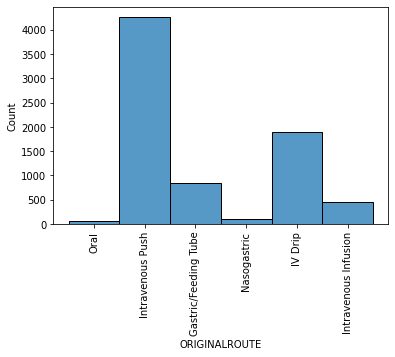

In [28]:
# input intervention

import seaborn as sns

p = sns.histplot(data=tiev,x="ORIGINALROUTE")
p.set_xticklabels(p.get_xticklabels(), rotation=90)

<ipython-input-29-7a16ecab5c8a>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_xticklabels(p.get_xticklabels(), rotation=90)


[Text(0, 0, 'Po Intake'),
 Text(1, 0, 'D5W'),
 Text(2, 0, 'Lactated Ringers'),
 Text(3, 0, 'TF Residual'),
 Text(4, 0, '.9% Normal Saline'),
 Text(5, 0, 'Gastric Meds'),
 Text(6, 0, 'Free Water Bolus'),
 Text(7, 0, 'Promote w/fiber'),
 Text(8, 0, 'Hespan'),
 Text(9, 0, 'Dopamine'),
 Text(10, 0, 'Fentanyl'),
 Text(11, 0, 'Levophed-k'),
 Text(12, 0, 'Neosynephrine-k'),
 Text(13, 0, 'Midazolam'),
 Text(14, 0, "Packed RBC's"),
 Text(15, 0, 'D5/.45NS'),
 Text(16, 0, 'Pre-Admission Intake'),
 Text(17, 0, 'Nepro'),
 Text(18, 0, 'GT Flush'),
 Text(19, 0, 'Boost Plus'),
 Text(20, 0, 'ProBalance'),
 Text(21, 0, 'Sodium Bicarbonate'),
 Text(22, 0, 'Propofol'),
 Text(23, 0, 'Potassium Phosphate'),
 Text(24, 0, 'D5NS'),
 Text(25, 0, 'PACU Crystalloids'),
 Text(26, 0, 'Replete w/fiber'),
 Text(27, 0, 'Heparin'),
 Text(28, 0, 'KCL')]

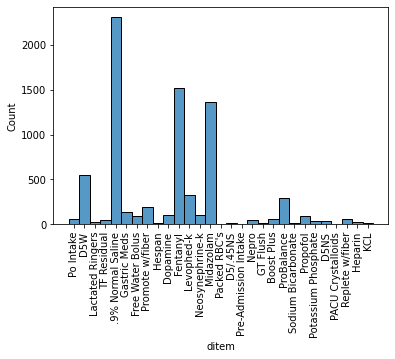

In [29]:
# Table items descriptions

ditem = pd.read_csv("D_ITEMS.csv")
dict_df = ditem.set_index('ITEMID')['LABEL'].to_dict()
tiev["ditem"] = tiev["ITEMID"].map(dict_df)

p = sns.histplot(data=tiev,x="ditem")
p.set_xticklabels(p.get_xticklabels(), rotation=90)


In [30]:
# Table D_ITEMS

ditem.head()

ROW_ID  ITEMID                                        LABEL ABBREVIATION  \
0     457     497  Patient controlled analgesia (PCA) [Inject]          NaN   
1     458     498                            PCA Lockout (Min)          NaN   
2     459     499                               PCA Medication          NaN   
3     460     500                               PCA Total Dose          NaN   
4     461     501                           PCV Exh Vt (Obser)          NaN   

  DBSOURCE      LINKSTO CATEGORY UNITNAME PARAM_TYPE  CONCEPTID  
0  carevue  chartevents      NaN      NaN        NaN        NaN  
1  carevue  chartevents      NaN      NaN        NaN        NaN  
2  carevue  chartevents      NaN      NaN        NaN        NaN  
3  carevue  chartevents      NaN      NaN        NaN        NaN  
4  carevue  chartevents      NaN      NaN        NaN        NaN

In [46]:
# Table ICUStays

icu = pd.read_csv("ICUSTAYS.csv")
print(icu.shape)
icu.head()

(61532, 12)


ROW_ID  SUBJECT_ID  HADM_ID  ICUSTAY_ID DBSOURCE FIRST_CAREUNIT  \
0     365         268   110404      280836  carevue           MICU   
1     366         269   106296      206613  carevue           MICU   
2     367         270   188028      220345  carevue            CCU   
3     368         271   173727      249196  carevue           MICU   
4     369         272   164716      210407  carevue            CCU   

  LAST_CAREUNIT  FIRST_WARDID  LAST_WARDID               INTIME  \
0          MICU            52           52  2198-02-14 23:27:38   
1          MICU            52           52  2170-11-05 11:05:29   
2           CCU            57           57  2128-06-24 15:05:20   
3          SICU            52           23  2120-08-07 23:12:42   
4           CCU            57           57  2186-12-25 21:08:04   

               OUTTIME     LOS  
0  2198-02-18 05:26:11  3.2490  
1  2170-11-08 17:46:57  3.2788  
2  2128-06-27 12:32:29  2.8939  
3  2120-08-10 00:39:04  2.0600  
4  2186-12-27 12:01:13  1.6202

In [47]:
# Take only patients that are in tuberc table

icu.drop(["ROW_ID"], axis=1, inplace=True)
ticu = pd.merge(tiev, icu, how="inner", on=["SUBJECT_ID"])
ticu.drop_duplicates()
print(ticu.shape)
ticu.head()

(48300, 34)


SUBJECT_ID  HADM_ID_x  SEQ_NUM ICD9_CODE  HADM_ID_y  ICUSTAY_ID_x  \
0       12139     148809      3.0     01190   148809.0      240663.0   
1       12139     148809      3.0     01190   148809.0      240663.0   
2       12139     148809      3.0     01190   148809.0      240663.0   
3       12139     148809      3.0     01190   148809.0      240663.0   
4       12139     148809      3.0     01190   148809.0      240663.0   

             CHARTTIME  ITEMID  AMOUNT AMOUNTUOM  RATE RATEUOM  \
0  2152-05-26 04:00:00   30056   100.0        ml   NaN     NaN   
1  2152-05-26 08:00:00   30056   100.0        ml   NaN     NaN   
2  2152-05-30 06:00:00   30013    50.0        ml   NaN     NaN   
3  2152-05-30 08:00:00   30013   300.0        ml   NaN     NaN   
4  2152-05-30 18:00:00   30013   100.0        ml   NaN     NaN   

             STORETIME     CGID   ORDERID  LINKORDERID STOPPED  NEWBOTTLE  \
0  2152-05-26 03:53:00  15477.0  11668241     11668241     NaN        NaN   
1  2152-05-26 08:10:00  19150.0   7762335     11668241     NaN        NaN   
2  2152-05-30 05:44:00  20706.0   1555379      4704410     NaN        NaN   
3  2152-05-30 08:01:00  16890.0   8942938      4704410     NaN        NaN   
4  2152-05-30 18:40:00  17480.0   8181876      4704410     NaN        NaN   

   ORIGINALAMOUNT ORIGINALAMOUNTUOM     ORIGINALROUTE  ORIGINALRATE  \
0             NaN                ml              Oral           NaN   
1             NaN                ml              Oral           NaN   
2           100.0                ml  Intravenous Push           NaN   
3           100.0                ml  Intravenous Push           NaN   
4           100.0                ml  Intravenous Push           NaN   

  ORIGINALRATEUOM ORIGINALSITE  HADM_ID  ICUSTAY_ID_y DBSOURCE FIRST_CAREUNIT  \
0             NaN          NaN   148809        240663  carevue           MICU   
1             NaN          NaN   148809        240663  carevue           MICU   
2             NaN          NaN   148809        240663  carevue           MICU   
3             NaN          NaN   148809        240663  carevue           MICU   
4             NaN          NaN   148809        240663  carevue           MICU   

  LAST_CAREUNIT  FIRST_WARDID  LAST_WARDID               INTIME  \
0          MICU            52           52  2152-05-25 23:06:09   
1          MICU            52           52  2152-05-25 23:06:09   
2          MICU            52           52  2152-05-25 23:06:09   
3          MICU            52           52  2152-05-25 23:06:09   
4          MICU            52           52  2152-05-25 23:06:09   

               OUTTIME    LOS  
0  2152-05-31 18:15:14  5.798  
1  2152-05-31 18:15:14  5.798  
2  2152-05-31 18:15:14  5.798  
3  2152-05-31 18:15:14  5.798  
4  2152-05-31 18:15:14  5.798

In [48]:
pat = pd.read_csv("PATIENTS.csv")
print(pat.shape)
pat.head()

(46520, 8)


ROW_ID  SUBJECT_ID GENDER                  DOB                  DOD  \
0     234         249      F  2075-03-13 00:00:00                  NaN   
1     235         250      F  2164-12-27 00:00:00  2188-11-22 00:00:00   
2     236         251      M  2090-03-15 00:00:00                  NaN   
3     237         252      M  2078-03-06 00:00:00                  NaN   
4     238         253      F  2089-11-26 00:00:00                  NaN   

              DOD_HOSP DOD_SSN  EXPIRE_FLAG  
0                  NaN     NaN            0  
1  2188-11-22 00:00:00     NaN            1  
2                  NaN     NaN            0  
3                  NaN     NaN            0  
4                  NaN     NaN            0

In [49]:
# Take only patients that are in tuberc table

tpat = pd.merge(ticu, pat, how="inner", on=["SUBJECT_ID"])
tpat.drop_duplicates()
print(tpat.shape)
tpat.head()

(48300, 41)


SUBJECT_ID  HADM_ID_x  SEQ_NUM ICD9_CODE  HADM_ID_y  ICUSTAY_ID_x  \
0       12139     148809      3.0     01190   148809.0      240663.0   
1       12139     148809      3.0     01190   148809.0      240663.0   
2       12139     148809      3.0     01190   148809.0      240663.0   
3       12139     148809      3.0     01190   148809.0      240663.0   
4       12139     148809      3.0     01190   148809.0      240663.0   

             CHARTTIME  ITEMID  AMOUNT AMOUNTUOM  RATE RATEUOM  \
0  2152-05-26 04:00:00   30056   100.0        ml   NaN     NaN   
1  2152-05-26 08:00:00   30056   100.0        ml   NaN     NaN   
2  2152-05-30 06:00:00   30013    50.0        ml   NaN     NaN   
3  2152-05-30 08:00:00   30013   300.0        ml   NaN     NaN   
4  2152-05-30 18:00:00   30013   100.0        ml   NaN     NaN   

             STORETIME     CGID   ORDERID  LINKORDERID STOPPED  NEWBOTTLE  \
0  2152-05-26 03:53:00  15477.0  11668241     11668241     NaN        NaN   
1  2152-05-26 08:10:00  19150.0   7762335     11668241     NaN        NaN   
2  2152-05-30 05:44:00  20706.0   1555379      4704410     NaN        NaN   
3  2152-05-30 08:01:00  16890.0   8942938      4704410     NaN        NaN   
4  2152-05-30 18:40:00  17480.0   8181876      4704410     NaN        NaN   

   ORIGINALAMOUNT ORIGINALAMOUNTUOM     ORIGINALROUTE  ORIGINALRATE  \
0             NaN                ml              Oral           NaN   
1             NaN                ml              Oral           NaN   
2           100.0                ml  Intravenous Push           NaN   
3           100.0                ml  Intravenous Push           NaN   
4           100.0                ml  Intravenous Push           NaN   

  ORIGINALRATEUOM ORIGINALSITE  HADM_ID  ICUSTAY_ID_y DBSOURCE FIRST_CAREUNIT  \
0             NaN          NaN   148809        240663  carevue           MICU   
1             NaN          NaN   148809        240663  carevue           MICU   
2             NaN          NaN   148809        240663  carevue           MICU   
3             NaN          NaN   148809        240663  carevue           MICU   
4             NaN          NaN   148809        240663  carevue           MICU   

  LAST_CAREUNIT  FIRST_WARDID  LAST_WARDID               INTIME  \
0          MICU            52           52  2152-05-25 23:06:09   
1          MICU            52           52  2152-05-25 23:06:09   
2          MICU            52           52  2152-05-25 23:06:09   
3          MICU            52           52  2152-05-25 23:06:09   
4          MICU            52           52  2152-05-25 23:06:09   

               OUTTIME    LOS  ROW_ID GENDER                  DOB  DOD  \
0  2152-05-31 18:15:14  5.798   11489      M  2092-01-24 00:00:00  NaN   
1  2152-05-31 18:15:14  5.798   11489      M  2092-01-24 00:00:00  NaN   
2  2152-05-31 18:15:14  5.798   11489      M  2092-01-24 00:00:00  NaN   
3  2152-05-31 18:15:14  5.798   11489      M  2092-01-24 00:00:00  NaN   
4  2152-05-31 18:15:14  5.798   11489      M  2092-01-24 00:00:00  NaN   

  DOD_HOSP DOD_SSN  EXPIRE_FLAG  
0      NaN     NaN            0  
1      NaN     NaN            0  
2      NaN     NaN            0  
3      NaN     NaN            0  
4      NaN     NaN            0

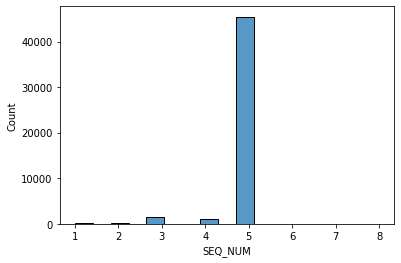

In [35]:
# Seq icd-9

p = sns.histplot(data=tpat,x="SEQ_NUM")



In [50]:
# Number of distinct patients

import numpy as np

np.size(tpat.SUBJECT_ID.unique())

6

In [1]:
p = sns.histplot(data=tpat,x="SUBJECT_ID", y="ICUSTAY_ID_x")

NameError: name 'sns' is not defined